## Exercise 1

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#### Q1

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

#### Q2

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

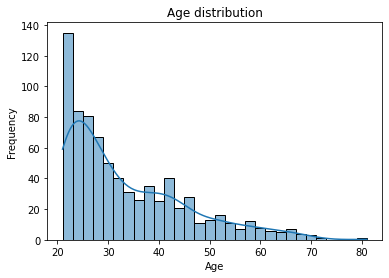

In [7]:
sb.histplot(df.age, bins =30, kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

mean age = 33.240885 std.dev = 11.760232

#### Q3

In [8]:
df[['class','mass','age']].corr()

,class,mass,age
class,1.000000,0.292695,0.238356
mass,0.292695,1.000000,0.036242
age,0.238356,0.036242,1.000000


therefore age and BMI have a slight positive correlation with class. class and age have a correlation of 0.238356 while class and BMI have a correlation of 0.292695

#### Q4

In [9]:
df.groupby('class').count()

,preg,plas,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


therefore the dataset is unbalanxced with class = 0 (test negative for diabetese having almost double the number of instancse than class 1 : test positive for diabetese)

#### Q5

In [10]:
feature_cols = ['preg','plas','pres','skin','insu','mass','pedi','age']
X = df[feature_cols]
y = df['class']

In [11]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)

In [13]:
#building a logistic regression
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(max_iter = 1000)
logisticreg.fit(X_train,y_train)
y_pred=logisticreg.predict(X_test)
score = logisticreg.score(X_train,y_train)
print("Score: ",score)

Score:  0.7690875232774674


#### Q6

In [14]:
# import the metrics class
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[138,  22],
       [ 25,  46]], dtype=int64)

visualization using a confusion matrix

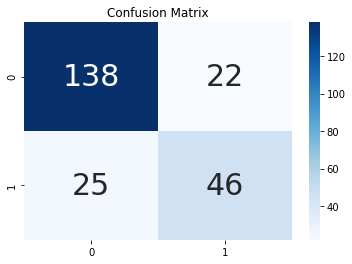

In [16]:
#displaying in the form of heatmap
ax = plt.axes()
df_cm = confusion_matrix
sb.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

#### Q7

In [19]:
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,1]
TNR = TN / (TN+FP)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Specificity:",TNR)

Accuracy: 0.7965367965367965
Precision: 0.6764705882352942
Recall: 0.647887323943662
Specificity: 0.8625


#### Q8

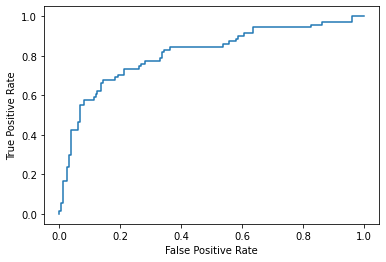

In [26]:
from sklearn.metrics import roc_curve
Y_pred_proba = logisticreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()